<a href="https://colab.research.google.com/github/jvishnuvardhan/Keras_Examples/blob/master/Callback_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.0.0rc1

     |████████████████████████████████| 86.3MB 1.2MB/s 
     |████████████████████████████████| 4.3MB 43.0MB/s 
     |████████████████████████████████| 501kB 15.0MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [3]:
import tensorflow as tf
from tensorflow import keras
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model

# Create a basic model instance
model=create_model()
history=model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))
loss, acc = model.evaluate(x_test, y_test,verbose=1)
print("Original model, accuracy: {:5.2f}%".format(100*acc))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.2201 - accuracy: 0.9342 - val_loss: 0.1021 - val_accuracy: 0.9696
Epoch 2/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0960 - accuracy: 0.9708 - val_loss: 0.0822 - val_accuracy: 0.9737
Epoch 3/10
60000/60000 [==============================] - 10s 175us/sample - loss: 0.0694 - accuracy: 0.9775 - val_loss: 0.0681 - val_accuracy: 0.9798
Epoch 4/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.0526 - accuracy: 0.9832 - val_loss: 0.0673 - val_accuracy: 0.9801
Epoch 5/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0434 - accuracy: 0.9859 - val_loss: 0.0647 - val_accuracy: 0.9809
Epoch 6/10
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.0731 - val_accuracy: 0.9799
Epoch 7/10
60000/60000 [====================

In [4]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


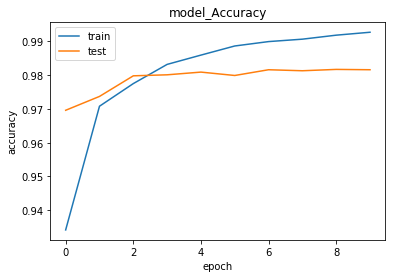

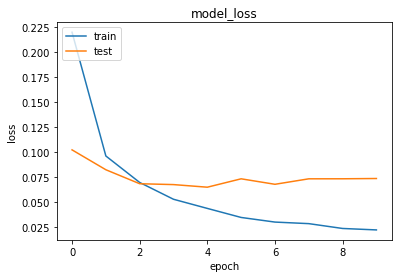

In [6]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["train","test"], loc="upper left")
plt.show()

# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["train","test"], loc="upper left")
plt.show()
